# Домашнее задание 4

(прислать до 02:00 10.03.2020)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1 (4 pts)

Пусть $\varphi: \mathbb{R} \to \mathbb{R}$ возрастающая и выпуклая функция. Также $f: \mathbb{R}^n \to \mathbb{R}$ выпуклая, следовательно $g(x) = \varphi(f(x))$ также выпуклая функция. Также пусть $f$ и $g$ дважды диференцируемы.

- (1 pts) Как связаны между собой задачи минимизации $f$ и $g$?
- (3 pts) Сравните градиентный метод и метод Ньютона для решения задач минимизации $f$ и $g$. Как связаны направления, получаемые каждым из методов? Как связаны методы в случае использования наискорейшего спуска для выбора шага?

$1.$ 

$\nabla g(x) = \varphi(f)'\nabla f(x) = 0 \Leftrightarrow \nabla f(x) = 0$ так как $\varphi(y)$  строго возрастает на $\mathbb{R}$ (если $\varphi(x)$ возрастает нестрого, то с существует область, в которой она константа, тогда задача минимизации не имеет смысла). Получается, что $\min g(x) = \varphi(\min f(x))$.

Из этого можно сделать вывод, что задачи эквивалентны. То есть, решив одну, автоматически получаем решение второй.

$2.$

$\nabla^2 g(x) = \varphi'(f(x)) \nabla^2 f(x) + \varphi''(f(x))\nabla f(x)\nabla f(x)^T$, обозначим $\nabla f(x) \nabla f(x)^T = F, \nabla^2 f(x) = B$.

Градиентный метод для $f(x)$: $h_{grad_f} = -\nabla f(x)$, метод Ньтона: $h_{newton_f} = - B^{-1}\nabla f(x) \Rightarrow h_{newton_f} = B^{-1}h_{grad_f}$.

Градиентный метод для $g(x)$: $h_{grad_g} = -\nabla g(x) = -\varphi'(f(x))\nabla f(x) = \varphi'(f(x))h_{grad_f},$ метод Ньютона: $h_{newton_g} = -(\frac{\varphi''(f(x)))}{\varphi'(f(x))}F + B)^{-1}\nabla f(x) = -(aF^{-1}-F^{-1}(B(I+aF^{-1}B)^{-1})aF^{-1})\nabla f(x) = -(aF^{-1}-F^{-1}(B(I+aF^{-1}B)^{-1})aF^{-1})h_{grad_f}, a = \frac{\varphi'(f(x)))}{\varphi''(f(x))}$. 

Учитывая, что $F = \nabla f(x) \nabla f(x)^T$, получаем: $h_{newton_g} = -(B^{-1} - \frac{B^{-1}\nabla f(x) \nabla f(x)^T B^{-1}}{a(1+\nabla f(x)^T B^{-1} \nabla f(x))})\nabla f(x)$.$

(переход с обращением матрицы доказан в задаче номер $3$). 

Можно заметить, что матрица $\frac{\varphi''(f(x)))}{\varphi'(f(x))}F + B \in \mathbb{S}_{++}$ , если $\varphi''(f(x))) > 0 \Rightarrow (\frac{\varphi''(f(x)))}{\varphi'(f(x))}F + B)^{-1} \in \mathbb{S}_{++}.$ Получается, что $h_{newton_g}$ является направлением убывания.




## Задача 2 (4 pts)

- (2 pts) Для задачи

$$
\log (e^x + e^{-x}) \to \min
$$

запустите метод Ньютона с постоянным шагом $\alpha = 1$ из точки $x_0 = 1$ и $x_0 = 1.1$. Что Вы заметили и почему?
- (1 pts) Что произойдёт, если использовать демпфированный метод Ньютона? Почему?
- (1 pts) Постройте графики сходимости для каждой постановки эксперимента и оцените время работы каждого метода.
При сравнении сходимости для разных условий стройте линии на одном графике и добавляйте легенду, иначе очень сложно понять, что происходит.
Также для сравнения сходимости достаточно указывать изменение нормы градиента, чтобы не загромождать рисунок.

In [262]:
import numpy as np
!pip install git+https://github.com/amkatrutsa/liboptpy
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss


  Cloning https://github.com/amkatrutsa/liboptpy to /tmp/pip-req-build-71vhcmrv
  Running command git clone -q https://github.com/amkatrutsa/liboptpy /tmp/pip-req-build-71vhcmrv
  Created wheel for liboptpy: filename=liboptpy-0.0.1-cp36-none-any.whl size=11730 sha256=859e0131d7ff1f2d99a7d6f0a9dde53004df46e341ed71f0be2b09ad6b2f19ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-86hz6jgz/wheels/8e/6e/38/60496dcf12f2c341e42d932d1403bdaaa17049556fdaba8d40
Successfully built liboptpy


In [0]:
f = lambda x: np.log(np.exp(x) + np.exp(-x))
grad_f = lambda x: 1 - 2/ (np.exp(2*x) + 1)
hess_f = lambda x: 4 / (np.exp(x) + np.exp(-x))**2

x0 = np.ones(1)

x1 = np.array([1.1])

In [264]:
x1.shape

(1,)

In [0]:
def direction(h,g):
  return g/h

In [266]:

newton_0 = methods.so.NewtonMethod(f, grad_f, hess_f, ss.ConstantStepSize(1), linsolver = direction)
x_newton_0 = newton_0.solve(x0, tol=1e-6, max_iter=50, disp=True)

newton_1 = methods.so.NewtonMethod(f, grad_f, hess_f, ss.ConstantStepSize(1), linsolver = direction)
x_newton_1 = newton_1.solve(x1, tol=1e-6, max_iter=50, disp=True)
newton_0_b = methods.so.NewtonMethod(f, grad_f, hess_f, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.), linsolver = direction)
x_newton_0_b = newton_0_b.solve(x0, tol=1e-6, max_iter=50, disp=True)

newton_1_b = methods.so.NewtonMethod(f, grad_f, hess_f, ss.Backtracking("Armijo", rho=0.9, beta=0.4, init_alpha=1), linsolver = direction, max_iter = 200)
x_newton_1_b = newton_1_b.solve(x1, tol=1e-6, max_iter=50, disp=True)

newton_1_w = methods.so.NewtonMethod(f, grad_f, hess_f, ss.Backtracking("Wolfe", rho=0.9, beta1=0.1, beta2=0.9,init_alpha=1.), linsolver = direction)
x_newton_1_w = newton_1_w.solve(x1, tol=1e-6, max_iter=50, disp=True)

Convergence in 5 iterations
Function value = [0.69314718]
Norm of gradient = 2.3447910280083306e-13
Maximum iteration exceeds!
Convergence in 50 iterations
Function value = [nan]
Norm of gradient = nan
Convergence in 4 iterations
Function value = [0.69314718]
Norm of gradient = 4.489199434409841e-08
Convergence in 3 iterations
Function value = [0.69314718]
Norm of gradient = 2.0737132122583546e-07
Convergence in 5 iterations
Function value = [0.69314718]
Norm of gradient = 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/liboptpy/base_optimizer.py:56: RuntimeWarning: invalid value encountered in add
  return x + alpha * h


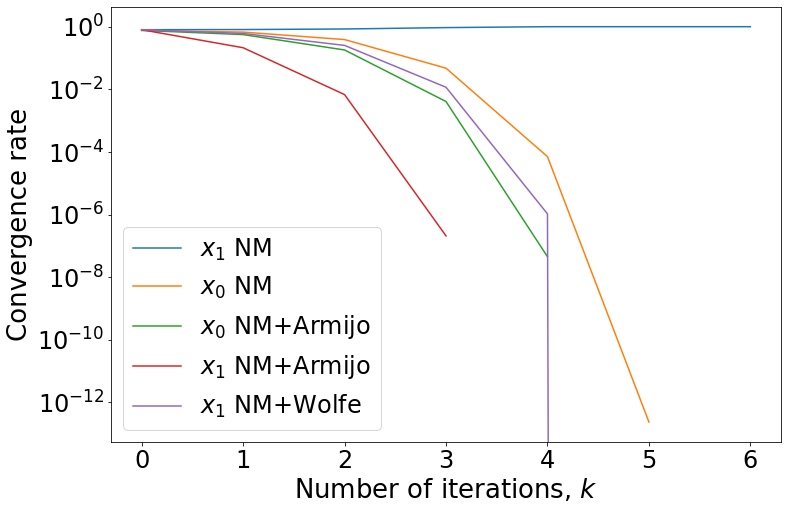

In [267]:

%matplotlib inline
import matplotlib.pyplot as plt

    
plt.figure(figsize=(12, 8))

plt.semilogy([np.linalg.norm(grad_f(x)) for x in newton_1.get_convergence()], label="$x_1$ NM")
plt.semilogy([np.linalg.norm(grad_f(x)) for x in newton_0.get_convergence()], label="$x_0$ NM")
plt.semilogy([np.linalg.norm(grad_f(x)) for x in newton_0_b.get_convergence()], label="$x_0$ NM+Armijo")
plt.semilogy([np.linalg.norm(grad_f(x)) for x in newton_1_b.get_convergence()], label="$x_1$ NM+Armijo")
plt.semilogy([np.linalg.norm(grad_f(x)) for x in newton_1_w.get_convergence()], label="$x_1$ NM+Wolfe")
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel(r"Convergence rate", fontsize=26)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend(loc="best", fontsize=24)

Если стартовать из точки $x_0 = 1.1$, метод с постоянным шагом не сойдется. Это происходит из-за того, что начальное приближение находится недостаточно близко к точке минимума и его "проскакиваем". Если искать с помощью линейного поиска, то метод сойдется.

In [0]:
def Newton(f, gradf, hessf, x0, epsilon, num_iter, 
                    disp=False, callback=None, **kwargs):
    x = x0.copy()
    alpha = 1
    x_ = []
    h_ = []
    x_.append(x0)
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        gradient = gradf(x)
        hess = hessf(x)
        h =  -gradient/hess
        x = x + alpha * h
        x_.append(x)
        h_.append(hess)
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return x_, h_

In [269]:
x, h = Newton(f,grad_f,hess_f, x1, 1e-6,1000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


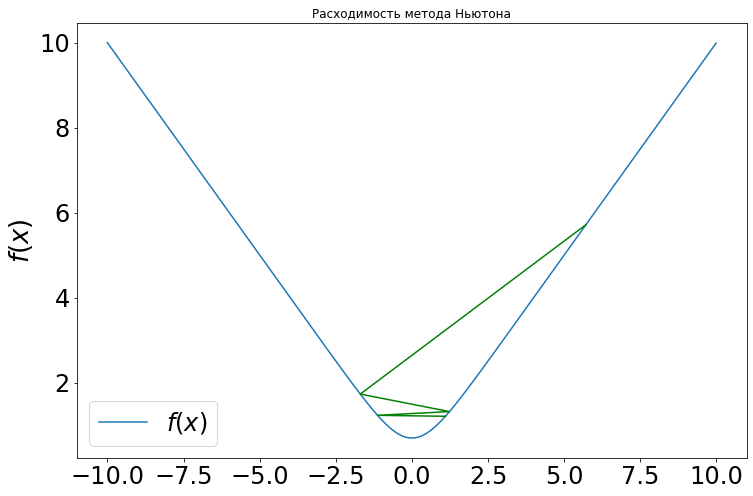

In [270]:
plt.figure(figsize=(12, 8))
y = [f(x) for x in x] 
plt.plot(np.arange(-10,10,0.01), [f(x) for x in np.arange(-10,10,0.01)], label = "$f(x)$")
plt.plot(x, [f(x) for x in x], color = 'green')
plt.ylabel(r"$f(x)$", fontsize=26)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.title('Расходимость метода Ньютона')
plt.legend(loc="best", fontsize=24)
plt.show()


## Задача 3 (4 pts)
В этой задаче надо вывести формулу Шермана-Моррисона-Вудберри

- (2 pts) Дано $A \in \mathbb{R}^{m \times n}$, $B \in \mathbb{R}^{n \times m}$ и $I + AB$ обратима. Покажите, что и $I + BA$ обратима, а также, что $(I + BA)^{-1}B = B(I + AB)^{-1}$ 
- (0.5 pts) Выведите, что $(I+P)^{-1} = I - (I+P)^{-1}P = I - P(I+P)^{-1}$
- (0.5 pts) Скомбинируйте два предыдущих факта и покажите, что $(I + UV)^{-1} = I - UV(I + UV)^{-1} = I - U(I + VU)^{-1}V$
- (1 pts) Обобщите предудыщий факт для матрицы $A + UV$ и получите формулу Шермана-Моррисона-Вудбери

$$
(A + UV)^{-1} = A^{-1} - A^{-1} U \left( I_k + V A^{-1} U \right)^{-1} V A^{-1},
$$

где $A \in \mathbb{R}^{n \times n}$, $U \in \mathbb{R}^{n \times k}$ и $V \in \mathbb{R}^{k \times n}$.


$1.$

$B(I + AB) = B+ BAB = (I+BA)B \Rightarrow (I + BA)^{-1}B = B(I + AB)^{-1}$.   

Теперь покажем, что матрица обратима: 

рассмотрим $\begin{pmatrix}
  I& -A\\
  B& I
\end{pmatrix} = \begin{pmatrix}
  I & 0\\
  B& I
\end{pmatrix} \begin{pmatrix}
  I& -A\\
  0& I+BA
\end{pmatrix} = \begin{pmatrix}
  I& -A\\
  0&I
\end{pmatrix}\begin{pmatrix}
  I+AB& 0\\
  B& I
\end{pmatrix}$.

Если взять от правой и левой частей равенства детерминант, то так как матрицы блочные с нулевым блоком, получим следующее равенство: $det(I+BA) = det(I+BA)$. Следовательно, матрица $I+BA$ обратима тогда и только тогда, когда обратима матрица $I+AB$.

$2.$

$(I+P)^{-1} = (I+P-P)(I+P)^{-1} = I - P(I+P)^{-1}$.

$3$.

Возьмем $P = UV$, из $2$-ого получаем $(I+UV)^{-1} = I - UV(I+UV)^{-1}$, из $3$ - го получаем $(I-UV(I+UV)^{-1} = (I-U(I+VU)^{-1}V)$.

$4.$

$(I+UV)^{-1}A^{-1} (A(I+UV))^{-1} = (A+AUV)^{-1} = (A+\tilde{U}V)^{-1}= (I-UV(I+UV)^{-1})A^{-1} \stackrel{3-ий}{=} A^{-1} - U(I+VU)^{-1}V A^{-1} = (I-V(I+UV)^{-1})A^{-1} = A^{-1} - A^{-1}\tilde{U}(I+VA^{-1}\tilde{U})^{-1}V A^{-1}$. 

## Задача 4 (11 pts)
- (1 pts) Покажите, что преобразование DFP даёт положительно определённую оценку для гессиана $B_{k+1}$
- (4 pts) Выведите (а не покажите, что формула справедлива!) формулу для $H_k$ в методе DFP
- (4 pts) Реализуйте BFGS метод и сравните его сходимость с методом Ньютона и с ускоренным методом Нестерова 
    - (3 pts) для задачи минимизации функции Розенброка из $x_0 = (-1.2, 1)$. Рассмотрите зависимость скорости сходимости каждого метода от размерности задачи
    - (1 pts) для задачи

    $$
    \min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right).
    $$

- (2 pts) Сравните постоянный шаг и правило Армихо (условие достаточного убывания) для выбора шага $\alpha_k$, всегда ли выполнялось условие $s^{\top}_k y_k > 0$?

$1.$

$H_{k+1} = H_k - \frac{H_ky_ky_k^TH_k}{y_k^TH_ky_k} + \frac{s_ks_k^T}{y_k^Ts_k}$

$z^TH_{k+1}z = z^TH_kz - \frac{z^TH_ky_ky_k^TH_kz}{y_k^TH_ky_k} + \frac{z^Ts_ks_k^Tz}{y_k^Ts_k} = \frac{ y_k^TH_ky_k z^TH_kz - (z^TH_ks_k)^2}{y_k^TH_ky_k} +\frac{(z^Ts_k)^2}{s_k^Ty_k}$. Обозначим $a = H_k^{1/2}z, b = H_k^{1/2}y_k$, получаем: $z^TH_{k+1}z = \frac{(a^Ta)(b^Tb) - (a^Tb)^2}{b^Tb} + \frac{(z^Ts_k)^2}{s_k^Ty_k}(*)$. Докажем, что $s_k^Ty_k>0: s_k^Ty_k = s_k^T\nabla f(x_{k+1}) - s_k^T\nabla f(x_k).$ Так как $x_{k+1}$ выбирается таким образом, что это есть точка минимума функции в направлении $s_k$, следовательно, $s_k^T\nabla f(x_{k+1}) = 0$ (производная сложной функции). Получаем, что $s_k^Ty_k = -s_k^T\nabla f(x_k) = (x_{k+1} - x_k = -\alpha_kH_k\nabla f(x_k)) = \alpha_k \nabla f(x_k)^T H_k \nabla f(x_k) > 0$. Если задачу одномерной оптимизизации решить не удается, то $s_k^T\nabla f(x_{k+1})$ не равно нулю и данное доказательство не работает. Но если выполнено условие Вольфа, то $s_k^Ty_k >0$ все равно (будет показано в 4-ом пункте данной задачи).

Первое слагаемое $(*)$ неорицательно по неравенству Коши-Буняковского. Получаем, что $\forall z \in \mathbb{R}^n \hookrightarrow z^TH_{k+1}z > 0.$

Заметим, что так как $H_{k+1} = B_{k+1}^{-1}$, то $B_{k+1}$ тоже положительно определенная.

$2.$

Идея метода заключается в том, что на каждой итерации происходит обновление гессиана (и , соответственно, обратного гессиана), добавляется некоторая поправка, которая хранит в себе поведение функции на предыдущих $k$ иттерациях. 

В методе DFP эта поправка 2 ранга, то есть $H_{k+1}$ ищется ввиде $H_k+auu^T+bvv^T$, где $a, b \in \mathbb{R}, u, v\in \mathbb{R}^n$. Матрица $H_{k+1}$ должна удовлетворять уравнению секущей: $H_{k+1}y_k = s_k \Rightarrow s_k = H_ky_k +auu^Ty_k+bvv^Ty_k.$ Векторы $u$ и $v$ должны нести какую-то информацию о поведении функции на предыдущих иттерациях, поэтому весьма логично выбрать $u = s_k, v = H_ky_k$. Получаем: $a(s_k^Ty_k)s_k + b(y_k^TH_ky_k) = s_k - H_ky_k$, приравнивая коэффиценты находим: $a = \frac{1}{s_k^Ty_k}, b= -\frac{1}{y_k^TH_ky_k}, H_{k+1} = H_k - \frac{H_ky_ky_k^TH_k}{y_k^TH_ky_k} + \frac{s_ks_k^T}{y_k^Ts_k}.$ Используя формулу обращения, получаем матрицу $B_{k+1}$.

$3$



In [0]:
from scipy.optimize.linesearch import line_search_wolfe2
import numpy as np
from scipy.optimize import rosen, rosen_hess, rosen_der
from liboptpy.step_size import Backtracking


In [0]:
def update_H(x_next, x_current, grad,H):

    current_grad = grad(x_next)
    grad_mem = grad(x_current)

    s = x_next - x_current

    y = current_grad - grad_mem

    rho = 1. / y.dot(s)

    Hy = H.dot(y)

    Hys = np.outer(Hy, s)

    ss = np.outer(s, s)

    H = rho * ss + H - rho * Hys - rho * Hys.T + rho**2 * y.dot(Hy) * ss

    x_current = x_next

    return H

In [0]:
def update_x(x,alpha,h):
  return x+h*alpha

In [0]:
def BFGS(f, gradf, x0, H0, rule, epsilon = 1e-6, num_iter=100, 
                    disp=False, callback=None, **kwargs):
    x = x0.copy()
    if rule == 'Wolfe':

      step = Backtracking("Wolfe", rho=0.9, beta1=0.1, beta2=0.9,init_alpha=1.,)
      step.assign_function(rosen,rosen_der, update_x_next=update_x)
    if rule == 'Armijo':
      step = ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.)
      step.assign_function(rosen,rosen_der, update_x_next=update_x)
    if rule == 'constant':
      step = ss.ConstantStepSize(0.1)

    x_ = []
    h_ = []
    hess = []
    
    x_.append(x0)
    iteration = 0
    H = H0.copy()
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:

        gradient = gradf(x)
        hess.append(H)

        h = -H @ gradient
        alpha = step.get_stepsize(h,x, num_iter=100)
        y = x.copy()
        x = x + alpha * h
        H = update_H(x,y, rosen_der, H)
        x_.append(x)
        h_.append(np.linalg.norm(gradf(x)))
        if callback is not None:
            callback(x)
        iteration += 1

        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return x_, h_,hess


In [0]:
x0 = np.array([-1.2,1])
H0 = rosen_hess(x0)

In [352]:
x, norm ,H= BFGS(rosen, rosen_der, x0, H0, 'Wolfe')
ac_grad = methods.fo.AcceleratedGD(rosen, rosen_der, ss.Backtracking("Wolfe", rho=0.9, beta1=0.1, beta2=0.9,init_alpha=1.,))
ac_grad.solve(x0)
newt = methods.so.NewtonMethod(rosen, rosen_der, rosen_hess, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.))
x_newt = newt.solve(x0, tol=1e-6, max_iter=50, disp=True)

Maximum iteration exceeds!
Convergence in 19 iterations
Function value = 5.544159065480214e-13
Norm of gradient = 8.774449322508263e-07


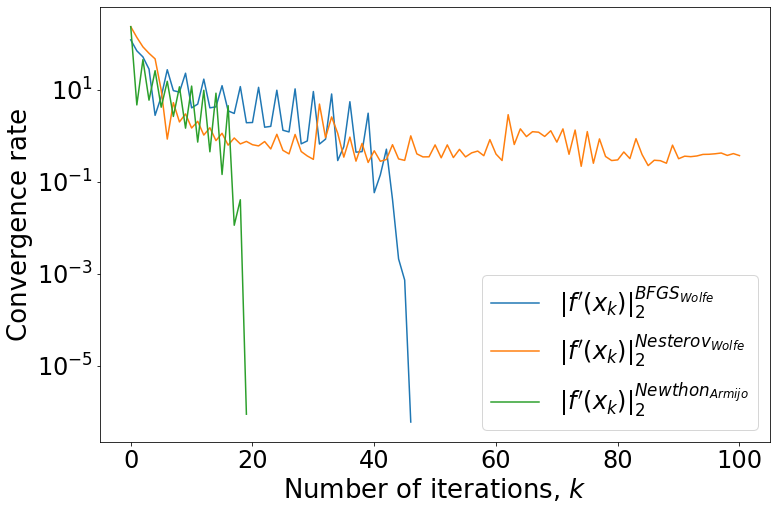

In [353]:
plt.figure(figsize=(12, 8))
plt.semilogy(np.arange(len(norm)), norm, label="$\| f'(x_k) \|^{BFGS_{Wolfe}}_2$")
plt.semilogy([np.linalg.norm(rosen_der(x)) for x in ac_grad.get_convergence()], label="$\| f'(x_k) \|^{Nesterov_{Wolfe}}_2$")
plt.semilogy([np.linalg.norm(rosen_der(x)) for x in newt.get_convergence()], label="$\| f'(x_k) \|^{Newthon_{Armijo}}_2$")
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel(r"Convergence rate", fontsize=26)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend(loc="best", fontsize=24)

$4.$
##Посмотрим на зависимость сходимости при различных стратегиях выбора длины шага на примере функции Розенброка.


In [0]:
x_, norm_,H_ = BFGS(rosen, rosen_der, x0, H0, 'Armijo')
x_c, norm_c ,H_c= BFGS(rosen, rosen_der, x0, H0, 'constant')



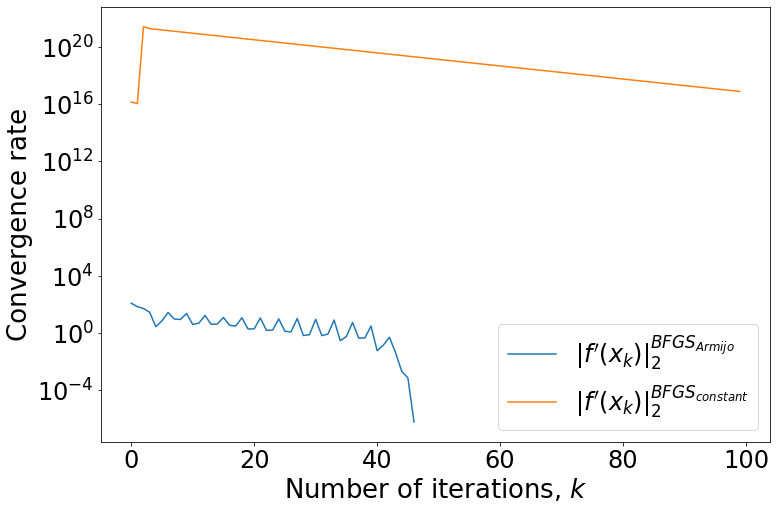

In [279]:
plt.figure(figsize=(12, 8))

plt.semilogy(np.arange(len(norm_)), norm_, label="$\| f'(x_k) \|^{BFGS_{Armijo}}_2$")
plt.semilogy(np.arange(len(norm_c)), norm_c, label="$\| f'(x_k) \|^{BFGS_{constant}}_2$")
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel(r"Convergence rate", fontsize=26)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend(loc="best", fontsize=24)

Правило Армихо не гарантирует положительную определенность гессиана, его гарантирует только правило Вольфа. 

Правило Вольфа: $$f(x_{k+1}) \leq f(x_k)+c_1\alpha_kh_k^T\nabla f(x_k)$$
$$h_k^T\nabla f(x_{k+1}) \geq c_2h_k^T\nabla f(x_k)$$

Первое неравенство - условие Армихо.
Перепишем второе неравенство в терминах $s_k = x_{k+1}- x_k = \alpha_k h_k, y_k = \nabla f(x_{k+1}) - \nabla f(x_k): \frac{s_k^T}{\alpha_k}(\nabla f(x_{k+1}) - c_2\nabla f(x_k)) \geq 0.$

Написанные выше условия близки к $s_k^Ty_k >0$.

 В задаче 4 пункт 1 при доказательстве положительной определенности матрицы $H_{k+1}$ было необходимо $s_k^Ty_k>0$. Получается, что только правило Вольфа гарантирует **глобальную** сходимость метода BFGS, так как если матрица $H_{k+1}$ на какой-то иттерации является необратимой, то метод не сходится.


$f(x) = \min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right):$

$\nabla f(x) = \frac{\sum exp(a_i^Tx+b_i)a_i}{\sum exp(a_i^Tx+b_i)}$

$H = \frac{\sum exp(a_i^Tx+b_i)a_ia_i^T}{\sum exp(a_i^Tx+b_i)}- \frac{(\sum exp(a_i^Tx+b_i)a_i)(\sum exp(a_i^Tx+b_i)a_i)^T}{\sum exp(a_i^Tx+b_i)^2}$

In [0]:
n = 2
m = 2
A = np.random.random((m,n))-0.5
b = np.random.random(m)-0.5
x=10*(np.random.random(n)-0.5)

In [0]:
def f(x):
  y = A@x + b
  #из прошлого домашнего задания
  max_ = np.max(y)
  return max_+ np.log(np.sum(np.exp(y)))


def grad_f(x):
  y = A@x+b
  #max_ = np.max(y)

  return A.T@(np.exp(y))/np.sum(np.exp(y))

def hess_f(x):
  y = A @ x+b
  max_ = np.max(y)

  exp_s = np.sum(np.exp(y))
  A_ = 0
  for a in A:
    A_= A_+np.outer(a,a)*np.exp(A[i,:].T@x+b[i])
  A_ = A_/exp_s - (grad_f(x)@grad_f(x).T)/exp_s**2

  return A_

In [346]:
from scipy.optimize import fmin_bfgs
r=fmin_bfgs(f, x0,grad_f, retall=True)

         Current function value: -5.567497
         Iterations: 8
         Function evaluations: 132
         Gradient evaluations: 120


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [331]:
x, norm, H = BFGS(f, grad_f, x0, H0, 'Wolfe')
ac = methods.fo.AcceleratedGD(f, grad_f, ss.Backtracking("Wolfe", rho=0.9, beta1=0.1, beta2=0.9,init_alpha=1.,))
ac.solve(x0)

Maximum iteration exceeds!


array([0.1213914 , 0.41650417])

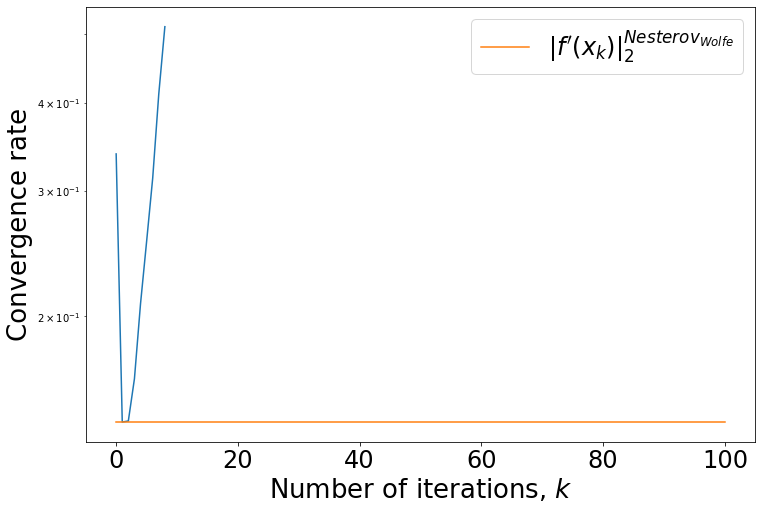

In [348]:
plt.figure(figsize=(12, 8))
plt.semilogy(np.arange(len(r[1:][0])), [np.linalg.norm(grad_f(x)) for x in r[1:][0]])
plt.semilogy([np.linalg.norm(grad_f(x)) for x in ac.get_convergence()], label="$\| f'(x_k) \|^{Nesterov_{Wolfe}}_2$")
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel(r"Convergence rate", fontsize=26)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend(loc="best", fontsize=24)

Тут происходит какая-то странная вещь, я не могу ее объяснить

## Задача 5 (5 pts)

Предложите свой квазиньютоновский метод, реализуйте его и сравните скорость его сходимости (по времени и по итерациям) с методом Ньютона и с методом BFGS, который Вы реализовали в задаче 4. Для сравнения используйте задачу 

$$
    \min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right).
$$

Обоснуйте (хотя бы в общих чертах), почему Ваш метод будет работать. 
Строгого доказательства я не требую, но мотивацию, которой Вы руководствовались, пожалуйста, приведите. 

Идея метода BFGS заключается в 2-rank update матрицы $H$. Можно предложить использовать приближение большего ранга, например 3-ьего:

$H_k+auu^T+bvv^T+cww^T$, где $a, b,c \in \mathbb{R}, u, v, w\in \mathbb{R}^n$. Матрица $H_{k+1}$ должна удовлетворять уравнению секущей: $H_{k+1}y_k = s_k \Rightarrow s_k = H_ky_k +auu^Ty_k+bvv^Ty_k+cww^Ty_k.$



